In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
df = pd.read_csv(r"D:\vikas\Train.csv")

In [3]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [4]:
df.shape

(8523, 12)

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
#Preprocessing the dataset

In [8]:
df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [9]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df.Item_Weight.fillna(df.Item_Weight.mean(),inplace=True)

In [11]:
df.Item_Weight.isnull().sum()

0

In [12]:
encoder = LabelEncoder()
df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

In [13]:
df.Outlet_Size .fillna(df.Outlet_Size .mean(),inplace=True)

In [14]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
df.shape

(8523, 12)

In [16]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [18]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [19]:
df['Outlet_Establishment_Year'].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

In [20]:
#Data Analysis
#ststistical measures about the data
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,1.736360,2181.288914
std,4.226124,0.051598,62.275067,8.371760,0.989181,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,0.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,1.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,2.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,3.000000,13086.964800


In [21]:
#Exploratory Data Analysis
#data visualizatione

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

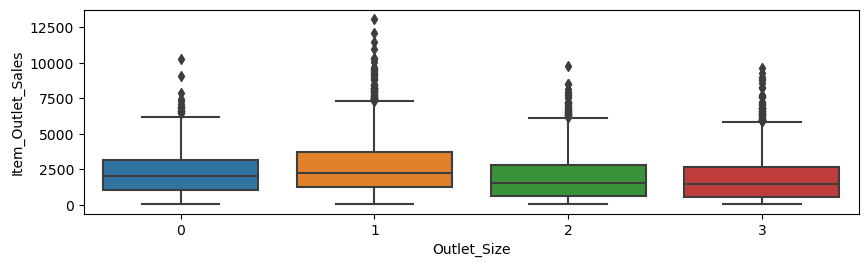

In [22]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df)

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

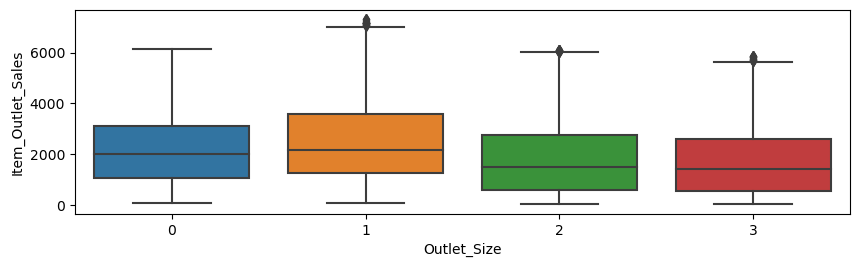

In [23]:
# Function to remove outliers using IQR
def remove_outliers(df, column, group_by):
    Q1 = df.groupby(group_by)[column].transform('quantile', 0.25)
    Q3 = df.groupby(group_by)[column].transform('quantile', 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
df_cleaned = remove_outliers(df, 'Item_Outlet_Sales', 'Outlet_Size')

# Create the box plot without outliers
plt.figure(figsize=(10, 9))
plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=df_cleaned)


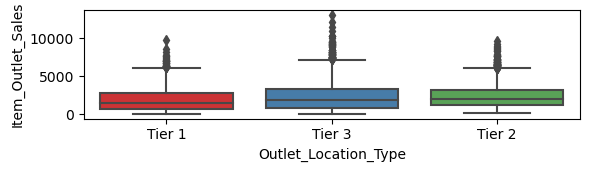

In [24]:
plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df, palette="Set1")
plt.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

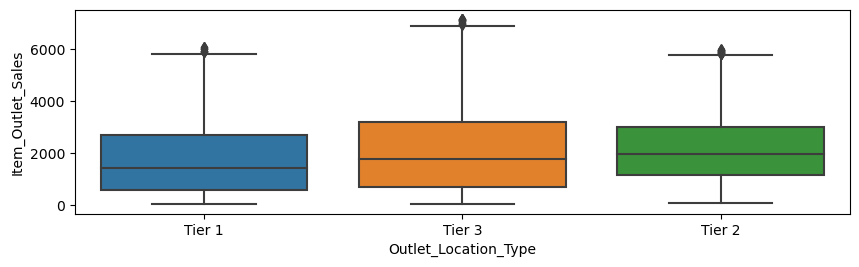

In [25]:
# Function to remove outliers using IQR
def remove_outliers(df, column, group_by):
    Q1 = df.groupby(group_by)[column].transform('quantile', 0.25)
    Q3 = df.groupby(group_by)[column].transform('quantile', 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
df_cleaned = remove_outliers(df, 'Item_Outlet_Sales', 'Outlet_Location_Type')

# Create the box plot without outliers
plt.figure(figsize=(10, 9))
plt.subplot(311)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=df_cleaned)


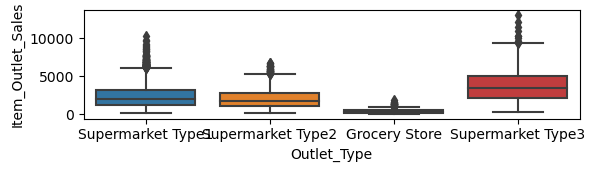

In [26]:
plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df)
plt.show()

<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

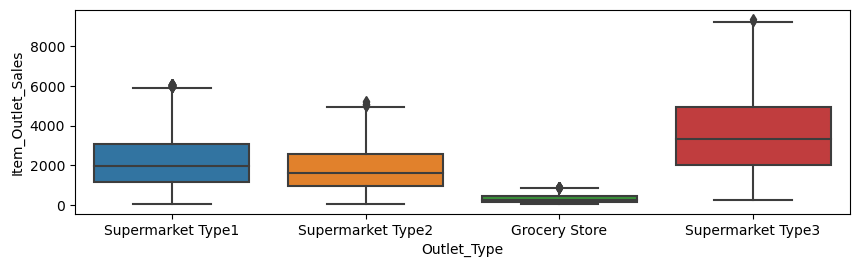

In [27]:
# Function to remove outliers using IQR
def remove_outliers(df, column, group_by):
    Q1 = df.groupby(group_by)[column].transform('quantile', 0.25)
    Q3 = df.groupby(group_by)[column].transform('quantile', 0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers
df_cleaned = remove_outliers(df, 'Item_Outlet_Sales', 'Outlet_Type')

# Create the box plot without outliers
plt.figure(figsize=(10, 9))
plt.subplot(311)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=df_cleaned)

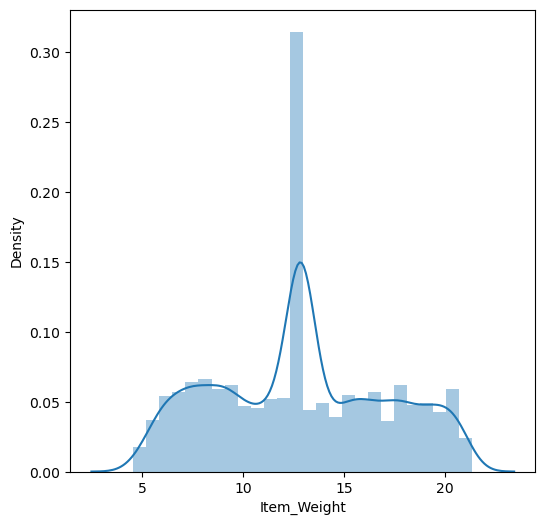

In [28]:
# Item_Weight distribution
import warnings
warnings.filterwarnings('ignore')
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Weight'])
plt.show()

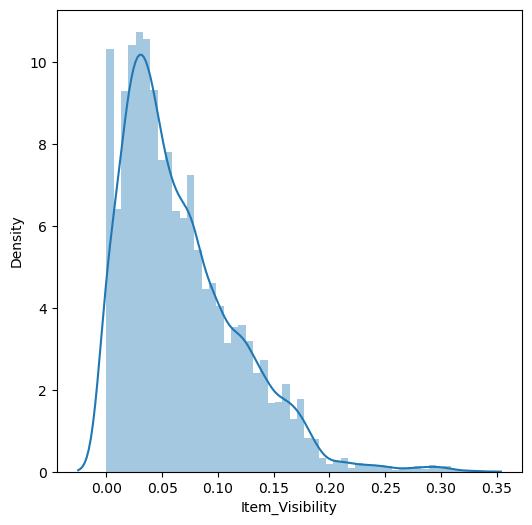

In [29]:
# Item Visibility distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_Visibility'])
plt.show()

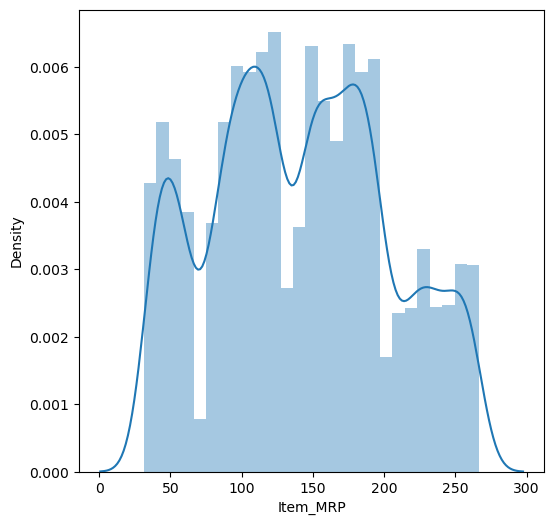

In [30]:
# Item MRP distribution
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

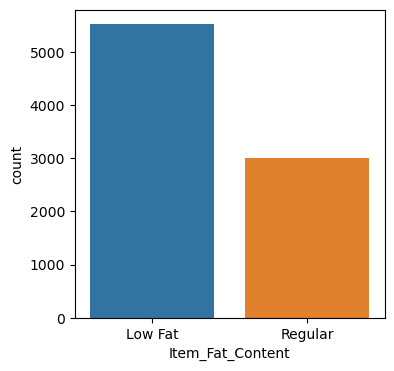

In [31]:
# Item_Fat_Content column
plt.figure(figsize=(4,4))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

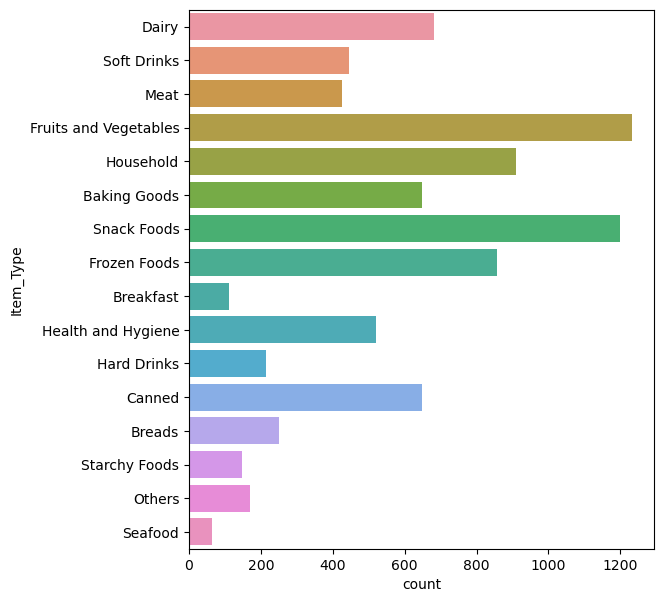

In [32]:
# Item_Type column
plt.figure(figsize=(6,7))
sns.countplot(y='Item_Type', data=df, orient='h')
plt.show()


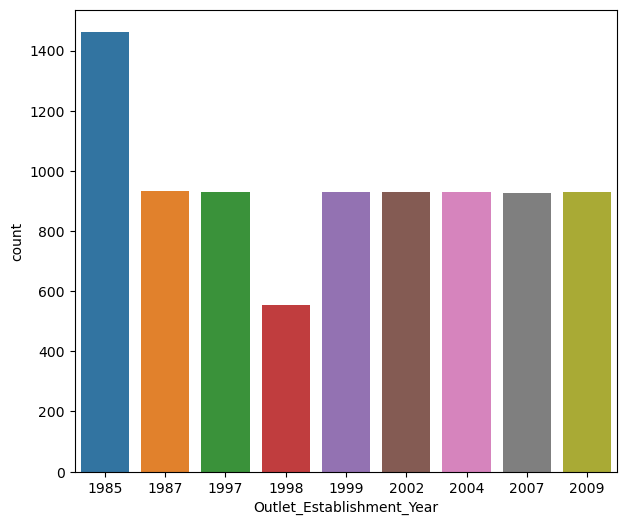

In [33]:
# Outlet_Establishment_Year column
plt.figure(figsize=(7,6))
sns.countplot(x='Outlet_Establishment_Year', data=df)
plt.show()

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,1,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,1,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,1,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,3,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,0,Tier 3,Supermarket Type1,994.7052


In [35]:
encoder = LabelEncoder()
#Lable Encoding
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [36]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,3,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [37]:
df.drop(columns=['Item_Identifier','Outlet_Identifier'],inplace=True)

In [38]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0,0.016047,4,249.8092,1999,1,0,1,3735.1380
1,5.92,1,0.019278,14,48.2692,2009,1,2,2,443.4228
2,17.50,0,0.016760,10,141.6180,1999,1,0,1,2097.2700
3,19.20,1,0.000000,6,182.0950,1998,3,2,0,732.3800
4,8.93,0,0.000000,9,53.8614,1987,0,2,1,994.7052


In [39]:
#Model Training

In [40]:
#Splitting features and Target
x = df.drop(columns='Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [41]:
#Splitting the data into Training data & Testing Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=2)

In [42]:
x

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.300,0,0.016047,4,249.8092,1999,1,0,1
1,5.920,1,0.019278,14,48.2692,2009,1,2,2
2,17.500,0,0.016760,10,141.6180,1999,1,0,1
3,19.200,1,0.000000,6,182.0950,1998,3,2,0
4,8.930,0,0.000000,9,53.8614,1987,0,2,1
...,...,...,...,...,...,...,...,...,...
8518,6.865,0,0.056783,13,214.5218,1987,0,2,1
8519,8.380,1,0.046982,0,108.1570,2002,3,1,1
8520,10.600,0,0.035186,8,85.1224,2004,2,1,1
8521,7.210,1,0.145221,13,103.1332,2009,1,2,2


In [43]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [44]:
print(x.shape, x_train.shape, x_test.shape)

(8523, 9) (5966, 9) (2557, 9)


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [81]:
# Initialize the models
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

# Fit the models on the training data
lr.fit(x_train, y_train)
knn.fit(x_train, y_train)
dt.fit(x_train, y_train)
rf.fit(x_train, y_train)

# Predict on the test data
y_pred1 = lr.predict(x_test)
y_pred2 = knn.predict(x_test)
y_pred3 = dt.predict(x_test)
y_pred4 = rf.predict(x_test)

In [82]:
# Calculate and print the mean squared error for each model
lr= mean_squared_error(y_test, y_pred1)
knn= mean_squared_error(y_test, y_pred2)
dt= mean_squared_error(y_test, y_pred3)
rf = mean_squared_error(y_test, y_pred4)

print(f"Linear Regression Mean Squared Error: {lr}")
print(f"KNeighborsRegressor Mean Squared Error: {knn}")
print(f"DecisionTreeRegressor Mean Squared Error: {dt}")
print(f"RandomForestRegressor Mean Squared Error: {rf}")

Linear Regression Mean Squared Error: 1307110.4880853128
KNeighborsRegressor Mean Squared Error: 1601918.0922017768
DecisionTreeRegressor Mean Squared Error: 2205967.236807702
RandomForestRegressor Mean Squared Error: 1187644.1430719285


In [87]:
# Calculate and print the R^2 score for each model
r2_1 = r2_score(y_test, y_pred1)
r2_2 = r2_score(y_test, y_pred2)
r2_3 = r2_score(y_test, y_pred3)
r2_4 = r2_score(y_test, y_pred4)

print(f"Linear Regression R^2 Score: {r2_1}")
print(f"KNeighborsRegressor R^2 Score: {r2_2}")
print(f"DecisionTreeRegressor R^2 Score: {r2_3}")
print(f"RandomForestRegressor R^2 Score: {r2_4}")

Linear Regression R^2 Score: 0.5190857676691123
KNeighborsRegressor R^2 Score: 0.41061967095325147
DecisionTreeRegressor R^2 Score: 0.18837692000278417
RandomForestRegressor R^2 Score: 0.5630400210586993


In [88]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [89]:
from sklearn.metrics import accuracy_score

rf.fit(x_train, y_train)

# Predicting on the testing set
y_pred = rf.predict(x_test)

accuracy = rf.score(x_test, y_test)
print( accuracy)

0.5601393183071633


In [47]:
import pickle
import joblib

In [90]:
joblib.dump(lr,'Store_sale_predictions.pkl')

['Store_sale_predictions.pkl']